# MACHINE LEARNING IN 6 HOURS

#    # LINEAR REGRESSION

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [15]:
#importing the dataset and extracting the independent and dependent variables
housing  = pd.read_csv("~/Documents/datasets/housing.csv")
cols = list(housing.cols.values)
X = housing.iloc[:,:-2].values
y = housing.iloc[:, 4].values

housing.head()

AttributeError: 'DataFrame' object has no attribute 'cols'

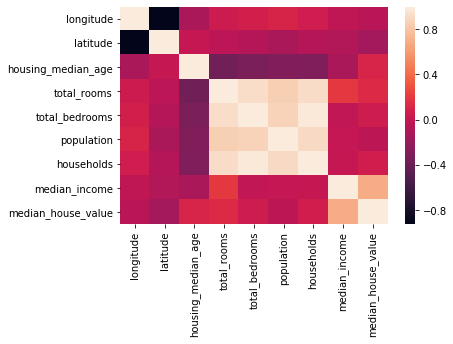

<Figure size 1080x720 with 0 Axes>

In [14]:
# Data visualisation
# Building the Correlation matrix
sns.heatmap(housing.corr())
plt.figure(figsize=(15,10))
plt.show()